In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as sm

In [3]:
data=pd.read_csv('LoansData.csv')

In [4]:
data.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [6]:
#Basic checks
#some variables are mis-matched
#variables required renaming
#Some missings exists in the variables
#Some variables required encoding
#LoanID is unique variable
#Amount Requested having high correlation wtih Amount Funded by investors

In [7]:
data.describe()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2500.00000,2499.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,1250.50000,12405.462185,12002.374186,5688.931321,10.072887,15223.184622,0.906688
std,721.83216,7802.933666,7746.767348,3963.118185,4.507416,18281.015258,1.231149
min,1.00000,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,625.75000,6000.000000,6000.000000,3500.000000,7.000000,5584.000000,0.000000
50%,1250.50000,10000.000000,10000.000000,5000.000000,9.000000,10948.000000,0.000000
75%,1875.25000,17000.000000,16000.000000,6800.000000,13.000000,18861.000000,1.000000
max,2500.00000,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [8]:
report = pandas_profiling.ProfileReport(data)

In [9]:
report.to_file('report.html')

In [ ]:
#Basic checks
#some variables are mis-matched - done
#variables required renaming - done
#Some missings exists in the variables
#Some variables required encoding
#LoanID is unique variable
#Amount Requested having high correlation wtih Amount Funded by investors

In [10]:
#Data preparation-1
#data.columns = ['LoanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
#       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
#       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
#       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
#       'Inquiries_in_the_Last_6_Months', 'Employment_Length']

#data.rename({'Amount.Requested': 'Amount_Requested'})

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'State', 'Home.Ownership', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [15]:
data.columns = [i.replace('.', '_') for i in data.columns]

In [25]:
data.columns

Index(['LoanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

In [22]:
data['Interest_Rate'] = data.Interest_Rate.apply(lambda x: float(str(x).replace('%','')))

In [26]:
data['Debt_To_Income_Ratio'] = data.Debt_To_Income_Ratio.apply(lambda x: float(str(x).replace('%','')))

In [28]:
data['Loan_Length'] = data.Loan_Length.apply(lambda x: float(str(x).replace(' months','')))

In [30]:
data['Employment_Length'] = data.Employment_Length.apply(lambda x: float(str(x).replace(' years','').replace(' year','').replace('< ', '').replace('+','')))

In [41]:
data['FICO_Range'] = (pd.to_numeric(data['FICO_Range'].str.split('-', expand=True)[0]) + pd.to_numeric(data['FICO_Range'].str.split('-', expand=True)[1]))/2

In [50]:
#Finding missings in each variables
data.isna().sum()

LoanID                             0
Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [53]:
#How to treat the missings values
#1. Y having missings - drop observations
data = data[-data.Interest_Rate.isna()]

In [55]:
data.isna().sum()

LoanID                             0
Amount_Requested                   0
Amount_Funded_By_Investors         1
Interest_Rate                      0
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [60]:
data.Home_Ownership.dtype

dtype('O')

In [61]:
data.Monthly_Income.dtype

dtype('float64')

In [64]:
data.Monthly_Income.median()

5000.0

In [63]:
data.Home_Ownership.mode()[0]

'MORTGAGE'

In [65]:
#X is having missings
def missing_value_treat(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x=x.fillna(x.median())
    else:
        x=x.fillna(x.mode()[0])
        
    return x    

In [67]:
data_new = data.apply(missing_value_treat)

In [68]:
data_new.isna().sum()

LoanID                            0
Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

In [70]:
#Outliers treatment
def outlier_treat(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper=x.quantile(0.99))
    else:
        x
    return x

In [71]:
data_new = data_new.apply(outlier_treat)

In [77]:
data_new.State.value_counts()  #State having somany categories (>20), either we drop the variable or regroup the categories

CA    432
NY    255
TX    174
FL    169
IL    101
GA     98
PA     96
NJ     94
VA     78
MA     73
OH     70
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
AL     38
MN     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
KS     21
OK     21
UT     16
NH     15
RI     15
WV     15
NM     13
AR     13
HI     12
AK     11
DC     11
DE      8
MT      7
VT      5
SD      4
WY      4
IN      3
IA      1
MS      1
Name: State, dtype: int64

In [78]:
data_final = pd.get_dummies(data_new, columns=['Loan_Purpose', 'Home_Ownership'], drop_first=True)

In [79]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 2499
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LoanID                           2498 non-null   int64  
 1   Amount_Requested                 2498 non-null   float64
 2   Amount_Funded_By_Investors       2498 non-null   float64
 3   Interest_Rate                    2498 non-null   float64
 4   Loan_Length                      2498 non-null   float64
 5   Debt_To_Income_Ratio             2498 non-null   float64
 6   State                            2498 non-null   object 
 7   Monthly_Income                   2498 non-null   float64
 8   FICO_Range                       2498 non-null   float64
 9   Open_CREDIT_Lines                2498 non-null   float64
 10  Revolving_CREDIT_Balance         2498 non-null   float64
 11  Inquiries_in_the_Last_6_Months   2498 non-null   float64
 12  Employment_Length   

In [80]:
data_final

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,1,20000.0,20000.00,8.90,36.0,14.90,SC,6541.67,737.0,14.0,...,0,0,0,0,0,0,0,0,0,0
1,2,19200.0,19200.00,12.12,36.0,28.36,TX,4583.33,717.0,12.0,...,0,0,0,0,0,0,0,0,0,0
2,3,35000.0,35000.00,21.98,60.0,23.81,CA,11500.00,692.0,14.0,...,0,0,0,0,0,0,0,0,0,0
3,4,10000.0,9975.00,9.99,36.0,14.30,KS,3833.33,697.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,5,12000.0,12000.00,11.71,36.0,18.78,NJ,3195.00,697.0,11.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,60.0,19.23,NY,9250.00,707.0,15.0,...,0,0,0,0,0,0,0,0,0,0
2496,2497,16000.0,16000.00,14.09,60.0,21.54,MD,8903.25,742.0,18.0,...,0,0,0,0,0,0,0,0,1,0
2497,2498,10000.0,10000.00,13.99,36.0,4.89,PA,2166.67,682.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2498,2499,6000.0,6000.00,12.42,36.0,16.66,NJ,3500.00,677.0,8.0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
data_final.drop(['LoanID', 'Amount_Funded_By_Investors', 'State'], axis=1, inplace=True)

In [82]:
data_final.head()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,20000.0,8.90,36.0,14.90,6541.67,737.0,14.0,14272.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,12.12,36.0,28.36,4583.33,717.0,12.0,11140.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,21.98,60.0,23.81,11500.00,692.0,14.0,21977.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,9.99,36.0,14.30,3833.33,697.0,10.0,9346.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,11.71,36.0,18.78,3195.00,697.0,11.0,14469.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
data_final.apply(lambda x: std(x)/mean(x))

Amount_Requested                    0.628432
Interest_Rate                       0.317634
Loan_Length                         0.240682
Debt_To_Income_Ratio                0.486321
Monthly_Income                      0.550025
FICO_Range                          0.049079
Open_CREDIT_Lines                   0.435358
Revolving_CREDIT_Balance            0.999740
Inquiries_in_the_Last_6_Months      1.287737
Employment_Length                   0.618718
Loan_Purpose_credit_card            2.153793
Loan_Purpose_debt_consolidation     0.954593
Loan_Purpose_educational           12.865976
Loan_Purpose_home_improvement       3.928640
Loan_Purpose_house                 11.131038
Loan_Purpose_major_purchase         4.871619
Loan_Purpose_medical                9.070097
Loan_Purpose_moving                 9.227022
Loan_Purpose_other                  3.380512
Loan_Purpose_renewable_energy      24.969982
Loan_Purpose_small_business         5.264280
Loan_Purpose_vacation              10.860588
Loan_Purpo

In [84]:
#Data preparation-2: Assumption of technique
#1. Normality - Y should follow normal distribution
    #if Y is not following normal, we should apply some transformation on Y such transformed Y should follow normal
#2. Linearity - Y & X should have linear relationship abs(corr(X, Y))>0.1
    #If X is not having linear relationship, either you should drop the variable or apply transformation on X such that transformed X having linear relationship with Y
#3. No missings - done
#4. No outliers - done
#5. No multicollinierity - If one variable expressed with other variable, you will drop one of the variable
#5. Homoscedasticity - Constant variance across data - if the data not following homoscedastic, we will apply log()

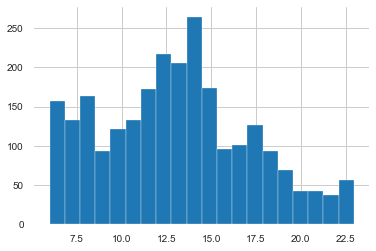

In [91]:
data_final.Interest_Rate.hist(bins=20)   #is it following normal?

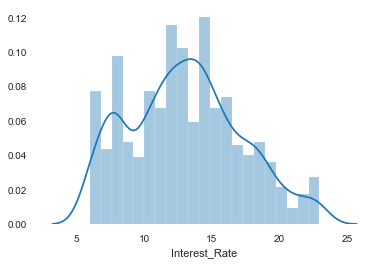

In [95]:
# Distribution of variables
import seaborn as sns
sns.distplot(data_final.Interest_Rate)

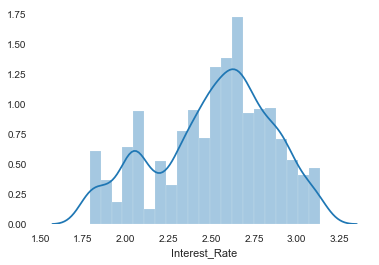

In [94]:
# Distribution of variables
import seaborn as sns
sns.distplot(np.log(data_final.Interest_Rate))

In [96]:
data_final['ln_Interest_Rate'] = np.log(data_final.Interest_Rate)

In [99]:
data_final.drop(['Interest_Rate'],axis=1, inplace=True)

In [101]:
corr_y = data_final.corrwith(data_final.ln_Interest_Rate)

In [102]:
corr_y.to_csv('corr_y.csv')

In [103]:
lst_vars = ['FICO_Range',
'Loan_Length',
'Amount_Requested',
'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Home_Ownership_RENT',
'Revolving_CREDIT_Balance',
'Open_CREDIT_Lines',
'Loan_Purpose_medical']


In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
X = data_final[data_final[lst_vars].columns.difference(['ln_Interest_Rate', 'Loan_Length', 'Open_CREDIT_Lines', 'Debt_To_Income_Ratio'])]

In [136]:
vif_values = pd.concat([pd.Series(X.columns), pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])])],axis=1)
vif_values.columns = ['variable', 'vif']
vif_values.sort_values(by='vif', ascending=False)

,variable,vif
1,FICO_Range,7.575679
0,Amount_Requested,4.244410
4,Loan_Purpose_debt_consolidation,2.503808
8,Revolving_CREDIT_Balance,2.339808
2,Home_Ownership_RENT,1.982067
3,Inquiries_in_the_Last_6_Months,1.601048
5,Loan_Purpose_home_improvement,1.231199
6,Loan_Purpose_major_purchase,1.128156
7,Loan_Purpose_medical,1.034802


In [138]:
data_final2 = pd.concat([data_final.ln_Interest_Rate, X],axis=1)

In [139]:
data_final2   #this will be input for model building

,ln_Interest_Rate,Amount_Requested,FICO_Range,Home_Ownership_RENT,Inquiries_in_the_Last_6_Months,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_major_purchase,Loan_Purpose_medical,Revolving_CREDIT_Balance
0,2.186051,20000.0,737.0,0,2.0,1,0,0,0,14272.0
1,2.494857,19200.0,717.0,0,1.0,1,0,0,0,11140.0
2,3.090133,35000.0,692.0,0,1.0,1,0,0,0,21977.0
3,2.301585,10000.0,697.0,0,0.0,1,0,0,0,9346.0
4,2.460443,12000.0,697.0,1,0.0,0,0,0,0,14469.0
...,...,...,...,...,...,...,...,...,...,...
2495,2.819592,30000.0,707.0,0,1.0,1,0,0,0,45880.0
2496,2.645465,16000.0,742.0,0,1.0,0,1,0,0,18898.0
2497,2.638343,10000.0,682.0,0,0.0,1,0,0,0,4544.0
2498,2.519308,6000.0,677.0,1,0.0,0,0,1,0,7753.0


In [140]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_final2, test_size=0.3, random_state=123)

In [141]:
data_final2.shape

(2498, 10)

In [142]:
train.shape   #2498*0.7 = 1748

(1748, 10)

In [143]:
test.shape  #2498*0.3 = 750

(750, 10)

In [146]:
#Build the model on train
import statsmodels.formula.api as smf

In [148]:
'+'.join(train.columns)

'ln_Interest_Rate+Amount_Requested+FICO_Range+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Purpose_debt_consolidation+Loan_Purpose_home_improvement+Loan_Purpose_major_purchase+Loan_Purpose_medical+Revolving_CREDIT_Balance'

In [149]:
#model = smf.ols('ln_Interest_Rate~Amount_Requested+FICO_Range+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Purpose_debt_consolidation+Loan_Purpose_home_improvement+Loan_Purpose_major_purchase+Loan_Purpose_medical+Revolving_CREDIT_Balance', data=train).fit()

In [157]:
model = smf.ols('ln_Interest_Rate~Amount_Requested+FICO_Range+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Revolving_CREDIT_Balance', data=train).fit()

In [158]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     790.0
Date:                Sun, 21 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:03:50   Log-Likelihood:                 457.25
No. Observations:                1748   AIC:                            -902.5
Df Residuals:                    1742   BIC:                            -869.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [162]:
train_pred = np.exp(model.predict(train))
train_actuals = np.exp(train.ln_Interest_Rate)

In [167]:
print('Train_MAPE:', np.mean(np.abs(train_actuals-train_pred)/train_actuals))

Train_MAPE: 0.14626245700957902


In [168]:
test_pred = np.exp(model.predict(test))
test_actuals = np.exp(test.ln_Interest_Rate)
print('Train_MAPE:', np.mean(np.abs(test_actuals-test_pred)/test_actuals))

Train_MAPE: 0.14046667456079237


In [ ]:
#in this example, train & test accuracies (MAPE) are similar, we can say that model is validated on test data